## METABOLIC SIMULATIONS COMPARTMENT 3

### LOADING MODELS AND CHANGING MEDIUM  

In [1]:
import cobra
import numpy as np
from scipy.integrate import solve_ivp
from tqdm import tqdm
import matplotlib.pyplot as plt
chlorella = cobra.io.read_sbml_model("Model_iCZ946.xml")  # Ajusta a tu ruta
bacillus = cobra.io.read_sbml_model("iYO844.xml")

In [2]:
from cobra import Model, Reaction, Metabolite


# Actualizar el rango de flujo de las reacciones de intercambio
def actualizar_reacciones(modelo):
    intercambios = [
        'EX_h_LPAREN_e_RPAREN_', 'EX_h2o_LPAREN_e_RPAREN_', 'EX_pi_LPAREN_e_RPAREN_',
        'EX_nh4_LPAREN_e_RPAREN_', 'EX_no3_LPAREN_e_RPAREN_', 'EX_so4_LPAREN_e_RPAREN_',
        'EX_fe2_LPAREN_e_RPAREN_', 'EX_fe3_LPAREN_e_RPAREN_', 'EX_mg2_LPAREN_e_RPAREN_',
        'EX_na1_LPAREN_e_RPAREN_', 'EX_photonVis_LPAREN_e_RPAREN_', 'EX_o2_LPAREN_e_RPAREN_',
        'EX_co2_LPAREN_e_RPAREN_', 'EX_hco3_LPAREN_e_RPAREN_', 'EX_ac_LPAREN_e_RPAREN_',
        'EX_rib_DASH_D_LPAREN_e_RPAREN_', 'EX_no2_LPAREN_e_RPAREN_', 'EX_his_DASH_L_LPAREN_e_RPAREN_',
        'EX_urea_LPAREN_e_RPAREN_', 'EX_ad_LPAREN_e_RPAREN_', 'EX_gua_LPAREN_e_RPAREN_',
        'EX_ade_LPAREN_e_RPAREN_', 'EX_alltt_LPAREN_e_RPAREN_', 'EX_alltn_LPAREN_e_RPAREN_',
        'EX_hxan_LPAREN_e_RPAREN_', 'EX_orn_LPAREN_e_RPAREN_', 'EX_gln_DASH_L_LPAREN_e_RPAREN_',
        'EX_urate_LPAREN_e_RPAREN_', 'EX_leu_DASH_L_LPAREN_e_RPAREN_', 'EX_arg_DASH_L_LPAREN_e_RPAREN_',
        'EX_so3_LPAREN_e_RPAREN_', 'EX_s_LPAREN_e_RPAREN_', 'EX_selt_LPAREN_e_RPAREN_',
        'EX_etoh_LPAREN_e_RPAREN_', 'EX_for_LPAREN_e_RPAREN_', 'EX_h2_LPAREN_e_RPAREN_',
        'EX_glyclt_LPAREN_e_RPAREN_', 'EX_succ_LPAREN_e_RPAREN_', 'EX_lac_DASH_D_LPAREN_e_RPAREN_',
        'EX_6mpur_LPAREN_e_RPAREN_', 'EX_tgua_LPAREN_e_RPAREN_', 'EX_tega_LPAREN_e_RPAREN_',
        'EX_5flura_LPAREN_e_RPAREN_', 'EX_cital_LPAREN_e_RPAREN_', 'EX_lido_LPAREN_e_RPAREN_',
        'EX_glc_DASH_A_LPAREN_e_RPAREN_', 'EX_btn_LPAREN_e_RPAREN_', 'EX_thm_LPAREN_e_RPAREN_',
        'EX_ncam_LPAREN_e_RPAREN_', 'EX_met_DASH_L_LPAREN_e_RPAREN_', 'EX_trp_DASH_L_LPAREN_e_RPAREN_',
        'EX_gly_LPAREN_e_RPAREN_'
    ]
    for rxn_id in intercambios:
        try:
            rxn = modelo.reactions.get_by_id(rxn_id)
            rxn.lower_bound = -0.5
            rxn.upper_bound = 0.5
            print(f"Rango de flujo actualizado para {rxn_id}")
        except KeyError:
            print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_reacciones(chlorella)


Rango de flujo actualizado para EX_h_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_h2o_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_pi_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_nh4_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_no3_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_so4_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_fe2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_fe3_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_mg2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_na1_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_photonVis_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_o2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_co2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_hco3_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_ac_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_rib_DASH_D_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_no2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_his_

In [3]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(chlorella, 'EX_photonVis_LPAREN_e_RPAREN_', -1000.0, 1000.0)

Rango de flujo actualizado para EX_photonVis_LPAREN_e_RPAREN_: [-1000.0, 1000.0]


In [4]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(chlorella, 'DM_o2D_LPAREN_u_RPAREN_', -1000.0, 1000.0)

Rango de flujo actualizado para DM_o2D_LPAREN_u_RPAREN_: [-1000.0, 1000.0]


In [5]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(chlorella, 'EX_co2_LPAREN_e_RPAREN_', -1000.0, 1000.0)

Rango de flujo actualizado para EX_co2_LPAREN_e_RPAREN_: [-1000.0, 1000.0]


In [6]:
chlorella.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_LPAREN_e_RPAREN_,0.5,2,2.90%
ad_e,EX_ad_LPAREN_e_RPAREN_,0.5,2,2.90%
arg_DASH_L_e,EX_arg_DASH_L_LPAREN_e_RPAREN_,0.5,6,8.70%
co2_e,EX_co2_LPAREN_e_RPAREN_,12.9,1,37.40%
glc_DASH_A_e,EX_glc_DASH_A_LPAREN_e_RPAREN_,0.5,6,8.70%
gln_DASH_L_e,EX_gln_DASH_L_LPAREN_e_RPAREN_,0.5,5,7.25%
gly_e,EX_gly_LPAREN_e_RPAREN_,0.5,2,2.90%
glyclt_e,EX_glyclt_LPAREN_e_RPAREN_,0.5,2,2.90%
h2o_e,EX_h2o_LPAREN_e_RPAREN_,0.5,0,0.00%
h_e,EX_h_LPAREN_e_RPAREN_,0.2221,0,0.00%


In [7]:
# Actualizar el rango de flujo de las reacciones de intercambio
def actualizar_reacciones(modelo):
    intercambios = [
        'EX_etha_e', 'EX_drib_e', 'EX_csn_e', 'EX_5mtr_e', 'EX_dtmp_e', 'EX_6pgc_e', 'EX_ctbt_e', 'EX_cu2_e',
        'EX_Larab_e', 'EX_ectoine_e', 'EX_cys__D_e', 'EX_cys__L_e', 'EX_eths_e', 'EX_cyst__L_e', 'EX_Lcyst_e',
        'EX_cytd_e', 'EX_abt__L_e', 'EX_etoh_e', 'EX_dad_2_e', 'EX_dcyt_e', 'EX_fe2_e', 'EX_dextrin_e', 'EX_dha_e',
        'EX_ac_e', 'EX_acac_e', 'EX_fe3_e', 'EX_ferrich_e', 'EX_diact_e', 'EX_djenk_e', 'EX_ferxa_e', 'EX_fol_e',
        'EX_acgam_e', 'EX_acmana_e', 'EX_acnam_e', 'EX_for_e', 'EX_fru_e', 'EX_actn__R_e', 'EX_ade_e', 'EX_adn_e',
        'EX_akg_e', 'EX_ala_B_e', 'EX_ala__D_e', 'EX_ala__L_e', 'EX_ala_L_Thr__L_e', 'EX_ala_L_asp__L_e',
        'EX_ala_L_gln__L_e', 'EX_ala_L_glu__L_e', 'EX_L_alagly_e', 'EX_ala_L_his__L_e', 'EX_ala_L_leu__L_e',
        'EX_g6p_e', 'EX_gal_e', 'EX_galctr__D_e', 'EX_galt_e', 'EX_galur_e', 'EX_gam6p_e', 'EX_gam_e',
        'EX_gbbtn_e', 'EX_glc__D_e', 'EX_glcn__D_e', 'EX_glcr_e', 'EX_glcur_e', 'EX_gln__L_e', 'EX_glu__D_e',
        'EX_alaala_e', 'EX_alltn_e', 'EX_amp_e', 'EX_amylase_e', 'EX_fum_e', 'EX_antim_e', 'EX_g1p_e',
        'EX_glu__L_e', 'EX_arab__D_e', 'EX_arab__L_e', 'EX_arbt_e', 'EX_arg__L_e', 'EX_argp_e', 'EX_arsenb_e',
        'EX_arsna_e', 'EX_arsni2_e', 'EX_asn__L_e', 'EX_asp__L_e', 'EX_bilea_e', 'EX_btd_RR_e', 'EX_glx_e',
        'EX_buts_e', 'EX_ca2_e', 'EX_cbl2_e', 'EX_pur_e', 'EX_pyr_e', 'EX_cd2_e', 'EX_gly_asn__L_e',
        'EX_cellb_e', 'EX_cgly_e', 'EX_raffin_e', 'EX_rib__D_e', 'EX_gly_asp__L_e', 'EX_ribflv_e', 'EX_chitob_e',
        'EX_gly_e', 'EX_chol_e', 'EX_rmn_e', 'EX_gly_gln__L_e', 'EX_chols_e', 'EX_chor_e', 'EX_cit_e',
        'EX_salcn_e', 'EX_gly_glu__L_e', 'EX_sbt__D_e', 'EX_ser__D_e', 'EX_citr__L_e', 'EX_cmp_e',
        'EX_ser__L_e', 'EX_gly_met__L_e', 'EX_so4_e', 'EX_spmd_e', 'EX_co2_e', 'EX_cobalt2_e', 'EX_crn_e',
        'EX_cro4_e', 'EX_srb__L_e', 'EX_starch_e', 'EX_subtilisin_e', 'EX_succ_e', 'EX_sucr_e',
        'EX_gly_pro__L_e', 'EX_sula_e', 'EX_taur_e', 'EX_glyb_e', 'EX_thiog_e', 'EX_glyc3p_e', 'EX_glyc_e',
        'EX_glyclt_e', 'EX_glycogen_e', 'EX_gmp_e', 'EX_gsn_e', 'EX_thr__L_e', 'EX_gthox_e', 'EX_thym_e',
        'EX_gthrd_e', 'EX_thymd_e', 'EX_gua_e', 'EX_tmp_e', 'EX_tre_e', 'EX_trp__L_e', 'EX_h2o2_e', 'EX_tyr__L_e',
        'EX_h2o_e', 'EX_ump_e', 'EX_ura_e', 'EX_h_e', 'EX_urate_e', 'EX_hexs_e', 'EX_urea_e', 'EX_uri_e',
        'EX_val__L_e', 'EX_xan_e', 'EX_xtsn_e', 'EX_xyl__D_e', 'EX_zn2_e', 'EX_hg2_e', 'EX_his__L_e',
        'EX_hqn_e', 'EX_hxan_e', 'EX_icit_e', 'EX_ile__L_e', 'EX_inost_e', 'EX_ins_e', 'EX_istnt_e',
        'EX_k_e', 'EX_lac__L_e', 'EX_lanth_e', 'EX_lcts_e', 'EX_leu__L_e', 'EX_lipt_e', 'EX_lys__L_e',
        'EX_madg_e', 'EX_mal__D_e', 'EX_mal__L_e', 'EX_malt_e', 'EX_malttr_e', 'EX_man1p_e', 'EX_man6p_e',
        'EX_man_e', 'EX_3ump_e', 'EX_mbdg_e', 'EX_melib_e', 'EX_meoh_e', 'EX_met__D_e', 'EX_met_L_ala__L_e',
        'EX_met__L_e', 'EX_metox__R_e', 'EX_metox_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_mnl_e', 'EX_mobd_e',
        'EX_mops_e', 'EX_mso3_e', 'EX_na1_e', 'EX_nac_e', 'EX_nh4_e', 'EX_ni2_e', 'EX_no2_e', 'EX_no3_e',
        'EX_o2_e', 'EX_orn__L_e', 'EX_pala_e', 'EX_4abut_e', 'EX_pep_e', 'EX_phe__L_e', 'EX_pi_e',
        'EX_pnto__R_e', 'EX_ppa_e', 'EX_ppi_e', 'EX_pro__L_e', 'EX_prolb_e', 'EX_pser__D_e', 'EX_pser__L_e'
    ]
    for rxn_id in intercambios:
        try:
            rxn = modelo.reactions.get_by_id(rxn_id)
            rxn.lower_bound = -0.3
            rxn.upper_bound = 0.3
            print(f"Rango de flujo actualizado para {rxn_id}")
        except KeyError:
            print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_reacciones(bacillus)

Rango de flujo actualizado para EX_etha_e
Rango de flujo actualizado para EX_drib_e
Rango de flujo actualizado para EX_csn_e
Rango de flujo actualizado para EX_5mtr_e
Rango de flujo actualizado para EX_dtmp_e
Rango de flujo actualizado para EX_6pgc_e
Rango de flujo actualizado para EX_ctbt_e
Rango de flujo actualizado para EX_cu2_e
Rango de flujo actualizado para EX_Larab_e
Rango de flujo actualizado para EX_ectoine_e
Rango de flujo actualizado para EX_cys__D_e
Rango de flujo actualizado para EX_cys__L_e
Rango de flujo actualizado para EX_eths_e
Rango de flujo actualizado para EX_cyst__L_e
Rango de flujo actualizado para EX_Lcyst_e
Rango de flujo actualizado para EX_cytd_e
Rango de flujo actualizado para EX_abt__L_e
Rango de flujo actualizado para EX_etoh_e
Rango de flujo actualizado para EX_dad_2_e
Rango de flujo actualizado para EX_dcyt_e
Rango de flujo actualizado para EX_fe2_e
Rango de flujo actualizado para EX_dextrin_e
Rango de flujo actualizado para EX_dha_e
Rango de flujo actua

In [8]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(bacillus, 'EX_co2_e', -1000.0, 1000.0)

Rango de flujo actualizado para EX_co2_e: [-1000.0, 1000.0]


In [9]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(bacillus, 'EX_o2_e', -1000.0, 1000.0)

Rango de flujo actualizado para EX_o2_e: [-1000.0, 1000.0]


In [10]:
bacillus.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
3ump_e,EX_3ump_e,0.3,9,3.29%
Larab_e,EX_Larab_e,0.3,15,5.49%
acac_e,EX_acac_e,0.3,4,1.46%
acnam_e,EX_acnam_e,0.3,11,4.02%
adn_e,EX_adn_e,0.1206,10,1.47%
akg_e,EX_akg_e,0.3,5,1.83%
alaala_e,EX_alaala_e,0.15,6,1.10%
amp_e,EX_amp_e,0.3,10,3.66%
arbt_e,EX_arbt_e,0.3,12,4.39%
argp_e,EX_argp_e,0.007292,6,0.05%


In [11]:
sol_bac = bacillus.optimize()
v2 = sol_bac.objective_value

In [12]:
v2

0.34153833137307427

### Metabolic simulations

In [14]:
chlorella_metabolites = ['DM_udg_LPAREN_m_RPAREN_', 'EX_ac_LPAREN_e_RPAREN_', 'EX_ade_LPAREN_e_RPAREN_', 'EX_alltt_LPAREN_e_RPAREN_',
                         'EX_gly_LPAREN_e_RPAREN_', 'EX_gua_LPAREN_e_RPAREN_', 'EX_h2_LPAREN_e_RPAREN_', 'EX_h2o_LPAREN_e_RPAREN_',
                         'EX_h_LPAREN_e_RPAREN_', 'EX_nh4_LPAREN_e_RPAREN_', 'EX_urate_LPAREN_e_RPAREN_', 'EX_urea_LPAREN_e_RPAREN_']

bacillus_metabolites = ['EX_6pgc_e', 'EX_ac_e', 'EX_acac_e', 'EX_btd_RR_e', 'EX_for_e', 'EX_fum_e', 'EX_gam6p_e',
                        'EX_gly_e', 'EX_gsn_e', 'EX_gthox_e', 'EX_h_e', 'EX_icit_e', 'EX_lac__L_e', 'EX_man6p_e', 'EX_nh4_e',
                        'EX_pi_e', 'EX_pnto__R_e', 'EX_pser__L_e', 'EX_pyr_e', 'EX_srb__L_e', 'EX_succ_e', 'EX_thym_e',
                        'EX_tyr__L_e', 'EX_ura_e', 'EX_xan_e', 'EX_xtsn_e']

# Mapeo de metabolitos compartidos
metabolite_mapping = {
    'EX_ac_LPAREN_e_RPAREN_': 'EX_ac_e',
    'EX_h2o_LPAREN_e_RPAREN_': 'EX_h2o_e',
    'EX_h_LPAREN_e_RPAREN_': 'EX_h_e',
    'EX_nh4_LPAREN_e_RPAREN_': 'EX_nh4_e',
    'EX_gly_LPAREN_e_RPAREN_': 'EX_gly_e',
}

In [15]:
metabolitos_chlorella = {met: [] for met in ["EX_ade_LPAREN_e_RPAREN_", "EX_arg_DASH_L_LPAREN_e_RPAREN_", "EX_gua_LPAREN_e_RPAREN_", "EX_urea_LPAREN_e_RPAREN_", "DM_o2D_LPAREN_u_RPAREN_"]}
metabolitos_bacillus = {met: [] for met in [
    "EX_6pgc_e", "EX_ac_e", "EX_acac_e", "EX_btd_RR_e",
    "EX_for_e", "EX_fum_e", "EX_gam6p_e", "EX_gly_e", "EX_gsn_e", 
    "EX_gthox_e", "EX_h_e", "EX_icit_e", "EX_lac__L_e", "EX_man6p_e", 
    "EX_pi_e", "EX_pnto__R_e", "EX_pser__L_e", "EX_pyr_e", 
    "EX_srb__L_e", "EX_succ_e", "EX_thym_e", "EX_tyr__L_e", 
    "EX_ura_e", "EX_xan_e", "EX_xtsn_e", ]}
growth_rates= {"chlorella": [], "bacillus": [], "O2":[], "CO2": []}
metabolitos_fluxes = {met: [] for met in ["EX_ade_LPAREN_e_RPAREN_", "EX_arg_DASH_L_LPAREN_e_RPAREN_", "EX_gua_LPAREN_e_RPAREN_", "EX_urea_LPAREN_e_RPAREN_", "DM_o2D_LPAREN_u_RPAREN_", "O2", "CO2", "NH4",  "EX_6pgc_e", "EX_ac_e", "EX_acac_e", "EX_btd_RR_e",
    "EX_for_e", "EX_fum_e", "EX_gam6p_e", "EX_gly_e", "EX_gsn_e", 
    "EX_gthox_e", "EX_h_e", "EX_icit_e", "EX_lac__L_e", "EX_man6p_e", 
    "EX_pi_e", "EX_pnto__R_e", "EX_pser__L_e", "EX_pyr_e", 
    "EX_srb__L_e", "EX_succ_e", "EX_thym_e", "EX_tyr__L_e", 
    "EX_ura_e", "EX_xan_e", "EX_xtsn_e", ]}
metabolitos_categories = {met: [] for met in ["NH4", "Azúcares", "Fuentes_C", "Aminoacidos", "Protones", "Acidos orgánicos", "Otros nutrientes", "fosfato"]}
metabolitos_categories_fluxes= {met: [] for met in ["NH4", "Azúcares", "Fuentes_C", "Aminoacidos", "Protones", "Acidos orgánicos", "Otros nutrientes", "fosfato"]}


t = 1000.00 h: : 242it [00:02, 94.50it/s] 


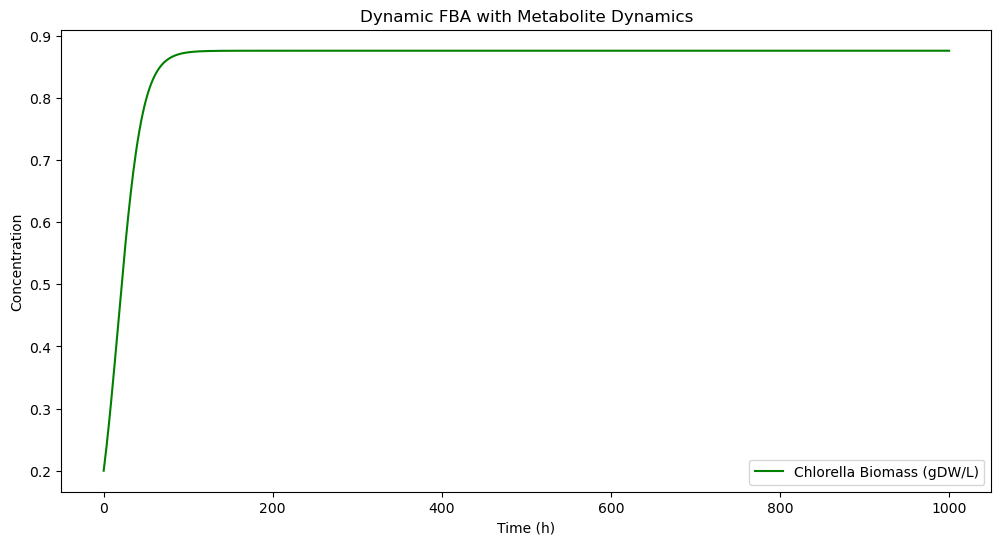

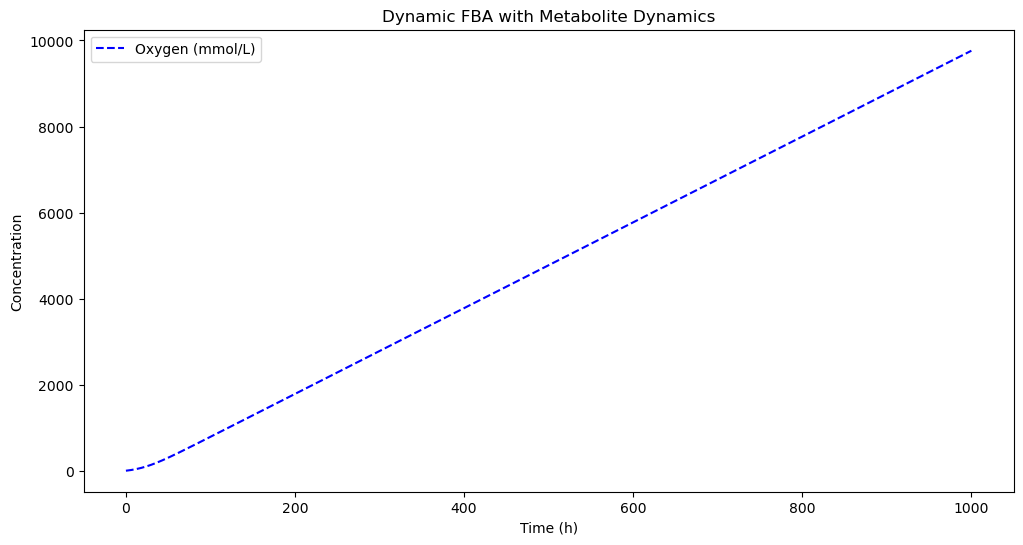

In [16]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.2, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 1000, 1000)

# Parámetros de muerte
d_1 = 0.01 # Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x1, O2  = y
    # Chlorella
    # ------------------
    with chlorella:
        sol_chl = chlorella.optimize()
        v1 = sol_chl.fluxes[chlorella_biomass_rxn]  # tasa de biomasa
        flux_o2_chl = sol_chl.fluxes[chlorella_o2_exchange]
        flux_co2_chl = sol_chl.fluxes["EX_co2_LPAREN_e_RPAREN_"]
        flux_nh4_chl = sol_chl.fluxes["EX_nh4_LPAREN_e_RPAREN_"]
        growth_rates["chlorella"].append(v1)
    # ------------------
    # Bacillus
    # ------------------
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx1_dt =  v1*x1*(1-x1) - x1*d_1
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = flux_o2_chl * x1 - 0.03*x1
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, O2 = y
    return x1 - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

t = 1000.00 h: : 254it [00:01, 204.98it/s]


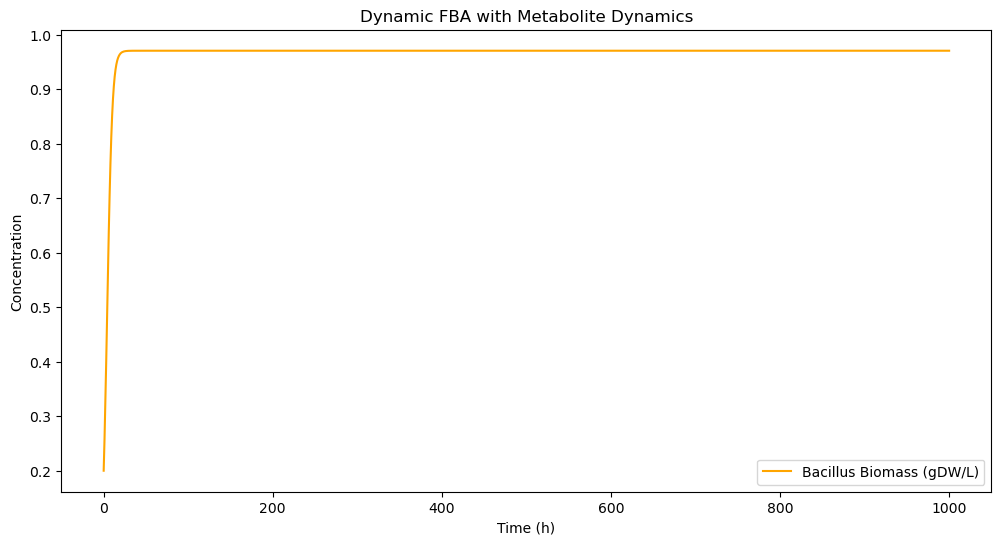

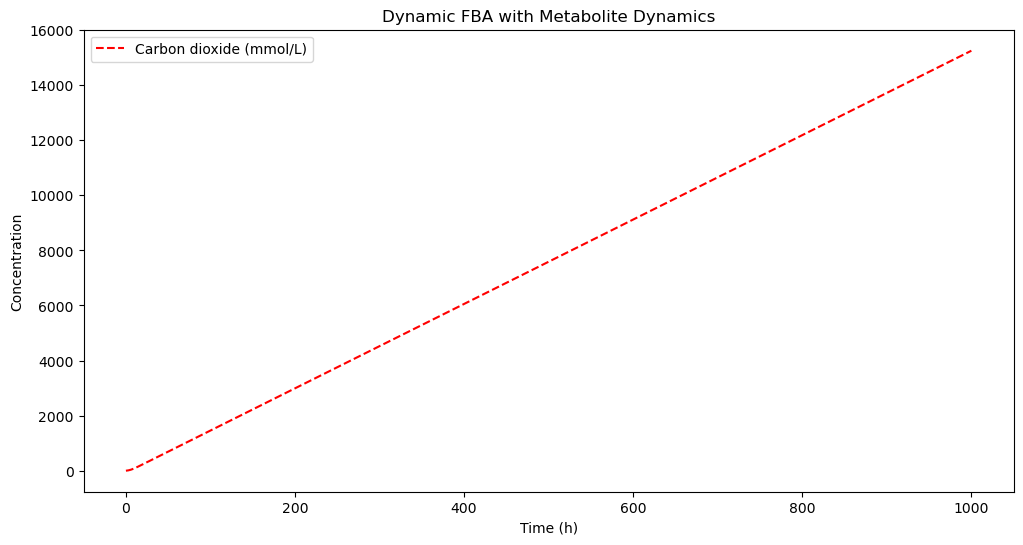

In [17]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.2, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 1000, 1000)

# Parámetros de muerte
d_2 = 0.01 # Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x2, CO2  = y
    # ------------------
    # Bacillus
    # ------------------
    with bacillus:
        sol_bac = bacillus.optimize()
        v2 = sol_bac.fluxes[bacillus_biomass_rxn]  # tasa de biomasa
        flux_o2_bac = sol_bac.fluxes[bacillus_o2_exchange]  # flujo real de O2 (+/-)
        flux_co2_bac = sol_bac.fluxes["EX_co2_e"]
        flux_nh4_bac = sol_bac.fluxes["EX_nh4_e"]
        growth_rates["bacillus"].append(v2)
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx2_dt =  v2*x2*(1- x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dCO2_dt= flux_co2_bac * x2  - 0.03*x2   
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x2, CO2 = y
    return x2 - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

t = 1000.00 h: : 807it [00:12, 66.16it/s]


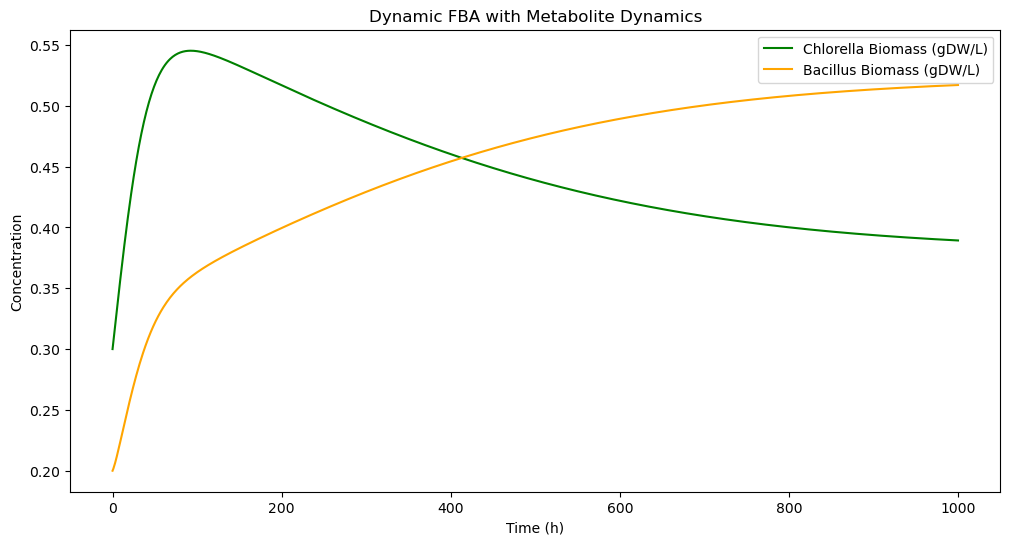

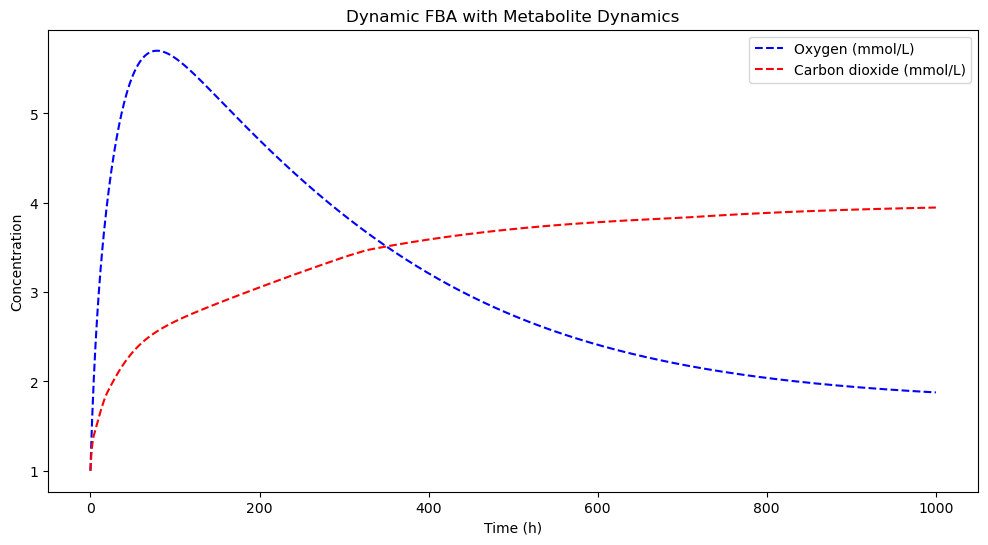

In [23]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.3, 0.2, 1, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 1000, 1000)

# Parámetros de muerte
d_1, d_2 = 0.005, 0.003 # Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x1, x2, O2, CO2  = y
    uptake_o2 = - (1.8* O2 / (1 + O2))
    uptake_co2 = - (0.6 * CO2 / (0.1 + CO2))

    # ------------------
    # Chlorella
    # ------------------
    with chlorella:
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").upper_bound = 1000
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").lower_bound = uptake_co2
        sol_chl = chlorella.optimize()
        v1 = sol_chl.fluxes[chlorella_biomass_rxn]  # tasa de biomasa
        flux_o2_chl = sol_chl.fluxes[chlorella_o2_exchange]
        flux_co2_chl = sol_chl.fluxes["EX_co2_LPAREN_e_RPAREN_"]
        flux_nh4_chl = sol_chl.fluxes["EX_nh4_LPAREN_e_RPAREN_"]
    # ------------------
    # Bacillus
    # ------------------
    with bacillus:
        bacillus.reactions.get_by_id('EX_o2_e').upper_bound = 1000
        bacillus.reactions.get_by_id('EX_o2_e').lower_bound = uptake_o2
        sol_bac = bacillus.optimize()
        v2 = sol_bac.fluxes[bacillus_biomass_rxn]  # tasa de biomasa
        flux_o2_bac = sol_bac.fluxes[bacillus_o2_exchange]  # flujo real de O2 (+/-)
        flux_co2_bac = sol_bac.fluxes["EX_co2_e"]
        flux_nh4_bac = sol_bac.fluxes["EX_nh4_e"]
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx1_dt =  v1*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt =  v2*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = flux_o2_chl * x1 + flux_o2_bac * x2  - 0.1*O2
    dCO2_dt= flux_co2_chl * x1 + flux_co2_bac * x2  - 0.6*CO2 


    
    NH4 = flux_nh4_chl * x1 + flux_nh4_bac * x2 
    Azucares = sol_bac.fluxes["EX_6pgc_e"]*x2 + sol_bac.fluxes["EX_gam6p_e"]*x2 + sol_bac.fluxes["EX_man6p_e"]*x2 + sol_bac.fluxes["EX_srb__L_e"]*x2
    Fuentes_C= sol_bac.fluxes["EX_ac_e"]*x2 + sol_bac.fluxes["EX_acac_e"]*x2 + sol_bac.fluxes["EX_btd_RR_e"]*x2 + sol_bac.fluxes["EX_for_e"]*x2 + sol_bac.fluxes["EX_lac__L_e"]*x2 + sol_bac.fluxes["EX_pyr_e"]*x2 + sol_bac.fluxes["EX_succ_e"]*x2
    Aminoacidos = sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"]*x1 + sol_bac.fluxes["EX_gly_e"]*x2 + sol_bac.fluxes["EX_pser__L_e"]*x2 + sol_bac.fluxes["EX_tyr__L_e"]*x2 
    Protones= sol_bac.fluxes["EX_h_e"]*x2
    Ácidos_organicos= sol_bac.fluxes["EX_pnto__R_e"]*x2 
    Other_nutrients= sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"]*x1 + sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"]*x1 +sol_bac.fluxes["EX_gsn_e"]*x2 + sol_bac.fluxes["EX_gthox_e"]*x2 + sol_bac.fluxes["EX_thym_e"]*x2 + sol_bac.fluxes["EX_ura_e"]*x2 +sol_bac.fluxes["EX_xan_e"]*x2 + sol_bac.fluxes["EX_xtsn_e"]*x2
    phosphate= sol_bac.fluxes["EX_pi_e"]*x2

    growth_rates["O2"].append(dO2_dt)
    growth_rates["CO2"].append(dCO2_dt)
    growth_rates["chlorella"].append(dx1_dt)
    growth_rates["bacillus"].append(dx2_dt)   
    
    metabolitos_categories_fluxes["NH4"].append(flux_nh4_chl + flux_nh4_bac)
    metabolitos_categories_fluxes["Azúcares"].append(sol_bac.fluxes["EX_6pgc_e"] + sol_bac.fluxes["EX_gam6p_e"] + sol_bac.fluxes["EX_man6p_e"] + sol_bac.fluxes["EX_srb__L_e"])
    metabolitos_categories_fluxes["Fuentes_C"].append(sol_bac.fluxes["EX_ac_e"] + sol_bac.fluxes["EX_acac_e"] + sol_bac.fluxes["EX_btd_RR_e"] + sol_bac.fluxes["EX_for_e"] + sol_bac.fluxes["EX_lac__L_e"] + sol_bac.fluxes["EX_pyr_e"] + sol_bac.fluxes["EX_succ_e"])
    metabolitos_categories_fluxes["Aminoacidos"].append(sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"] + sol_bac.fluxes["EX_gly_e"] + sol_bac.fluxes["EX_pser__L_e"] + sol_bac.fluxes["EX_tyr__L_e"])
    metabolitos_categories_fluxes["Protones"].append(sol_bac.fluxes["EX_h_e"])
    metabolitos_categories_fluxes["Acidos orgánicos"].append(sol_bac.fluxes["EX_pnto__R_e"])
    metabolitos_categories_fluxes["Otros nutrientes"].append(sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"] + sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"] +sol_bac.fluxes["EX_gsn_e"] + sol_bac.fluxes["EX_gthox_e"] + sol_bac.fluxes["EX_thym_e"] + sol_bac.fluxes["EX_ura_e"] +sol_bac.fluxes["EX_xan_e"] + sol_bac.fluxes["EX_xtsn_e"])
    metabolitos_categories_fluxes["fosfato"].append(sol_bac.fluxes["EX_pi_e"])

    metabolitos_categories["NH4"].append(NH4)
    metabolitos_categories["Azúcares"].append(Azucares)
    metabolitos_categories["Fuentes_C"].append(Fuentes_C)
    metabolitos_categories["Aminoacidos"].append(Aminoacidos)
    metabolitos_categories["Protones"].append(Protones)
    metabolitos_categories["Acidos orgánicos"].append(Ácidos_organicos)
    metabolitos_categories["Otros nutrientes"].append(Other_nutrients)
    metabolitos_categories["fosfato"].append(phosphate)
    
    metabolitos_chlorella["EX_ade_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"]*x1 )
    metabolitos_chlorella["EX_arg_DASH_L_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"]*x1)
    metabolitos_chlorella["EX_gua_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"]*x1)
    metabolitos_chlorella["EX_urea_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_urea_LPAREN_e_RPAREN_"]*x1)
    metabolitos_bacillus["EX_6pgc_e"].append(sol_bac.fluxes["EX_6pgc_e"]*x2)        
    metabolitos_bacillus["EX_ac_e"].append(sol_bac.fluxes["EX_ac_e"]*x2)
    metabolitos_bacillus["EX_acac_e"].append(sol_bac.fluxes["EX_acac_e"]*x2)
    metabolitos_bacillus["EX_btd_RR_e"].append(sol_bac.fluxes["EX_btd_RR_e"]*x2)
    metabolitos_bacillus["EX_for_e"].append(sol_bac.fluxes["EX_for_e"]*x2)
    metabolitos_bacillus["EX_fum_e"].append(sol_bac.fluxes["EX_fum_e"]*x2)
    metabolitos_bacillus["EX_gam6p_e"].append(sol_bac.fluxes["EX_gam6p_e"]*x2)
    metabolitos_bacillus["EX_gly_e"].append(sol_bac.fluxes["EX_gly_e"]*x2)
    metabolitos_bacillus["EX_gsn_e"].append(sol_bac.fluxes["EX_gsn_e"]*x2)
    metabolitos_bacillus["EX_gthox_e"].append(sol_bac.fluxes["EX_gthox_e"]*x2)
    metabolitos_bacillus["EX_h_e"].append(sol_bac.fluxes["EX_h_e"]*x2)
    metabolitos_bacillus["EX_icit_e"].append(sol_bac.fluxes["EX_icit_e"]*x2)
    metabolitos_bacillus["EX_lac__L_e"].append(sol_bac.fluxes["EX_lac__L_e"]*x2)
    metabolitos_bacillus["EX_man6p_e"].append(sol_bac.fluxes["EX_man6p_e"]*x2)
    metabolitos_bacillus["EX_pi_e"].append(sol_bac.fluxes["EX_pi_e"]*x2)
    metabolitos_bacillus["EX_pnto__R_e"].append(sol_bac.fluxes["EX_pnto__R_e"]*x2)
    metabolitos_bacillus["EX_pser__L_e"].append(sol_bac.fluxes["EX_pser__L_e"]*x2)
    metabolitos_bacillus["EX_pyr_e"].append(sol_bac.fluxes["EX_pyr_e"]*x2)
    metabolitos_bacillus["EX_srb__L_e"].append(sol_bac.fluxes["EX_srb__L_e"]*x2)
    metabolitos_bacillus["EX_succ_e"].append(sol_bac.fluxes["EX_succ_e"]*x2)
    metabolitos_bacillus["EX_thym_e"].append(sol_bac.fluxes["EX_thym_e"]*x2)
    metabolitos_bacillus["EX_tyr__L_e"].append(sol_bac.fluxes["EX_tyr__L_e"]*x2)
    metabolitos_bacillus["EX_ura_e"].append(sol_bac.fluxes["EX_ura_e"]*x2)
    metabolitos_bacillus["EX_xan_e"].append(sol_bac.fluxes["EX_xan_e"]*x2)
    metabolitos_bacillus["EX_xtsn_e"].append(sol_bac.fluxes["EX_xtsn_e"]*x2)

    
    metabolitos_fluxes["O2"].append(flux_o2_chl + flux_o2_bac) 
    metabolitos_fluxes["CO2"].append(flux_co2_chl+ flux_co2_bac) 
    metabolitos_fluxes["NH4"].append(flux_nh4_chl+ flux_nh4_bac)
    metabolitos_fluxes["EX_ade_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_gua_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_urea_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_urea_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_6pgc_e"].append(sol_bac.fluxes["EX_6pgc_e"])        
    metabolitos_fluxes["EX_ac_e"].append(sol_bac.fluxes["EX_ac_e"])
    metabolitos_fluxes["EX_acac_e"].append(sol_bac.fluxes["EX_acac_e"])
    metabolitos_fluxes["EX_btd_RR_e"].append(sol_bac.fluxes["EX_btd_RR_e"])
    metabolitos_fluxes["EX_for_e"].append(sol_bac.fluxes["EX_for_e"])
    metabolitos_fluxes["EX_fum_e"].append(sol_bac.fluxes["EX_fum_e"])
    metabolitos_fluxes["EX_gam6p_e"].append(sol_bac.fluxes["EX_gam6p_e"])
    metabolitos_fluxes["EX_gly_e"].append(sol_bac.fluxes["EX_gly_e"])
    metabolitos_fluxes["EX_gsn_e"].append(sol_bac.fluxes["EX_gsn_e"])
    metabolitos_fluxes["EX_gthox_e"].append(sol_bac.fluxes["EX_gthox_e"])
    metabolitos_fluxes["EX_h_e"].append(sol_bac.fluxes["EX_h_e"])
    metabolitos_fluxes["EX_icit_e"].append(sol_bac.fluxes["EX_icit_e"])
    metabolitos_fluxes["EX_lac__L_e"].append(sol_bac.fluxes["EX_lac__L_e"])
    metabolitos_fluxes["EX_man6p_e"].append(sol_bac.fluxes["EX_man6p_e"])
    metabolitos_fluxes["EX_pi_e"].append(sol_bac.fluxes["EX_pi_e"])
    metabolitos_fluxes["EX_pnto__R_e"].append(sol_bac.fluxes["EX_pnto__R_e"])
    metabolitos_fluxes["EX_pser__L_e"].append(sol_bac.fluxes["EX_pser__L_e"])
    metabolitos_fluxes["EX_pyr_e"].append(sol_bac.fluxes["EX_pyr_e"])
    metabolitos_fluxes["EX_srb__L_e"].append(sol_bac.fluxes["EX_srb__L_e"])
    metabolitos_fluxes["EX_succ_e"].append(sol_bac.fluxes["EX_succ_e"])
    metabolitos_fluxes["EX_thym_e"].append(sol_bac.fluxes["EX_thym_e"])
    metabolitos_fluxes["EX_tyr__L_e"].append(sol_bac.fluxes["EX_tyr__L_e"])
    metabolitos_fluxes["EX_ura_e"].append(sol_bac.fluxes["EX_ura_e"])
    metabolitos_fluxes["EX_xan_e"].append(sol_bac.fluxes["EX_xan_e"])
    metabolitos_fluxes["EX_xtsn_e"].append(sol_bac.fluxes["EX_xtsn_e"])
    

    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, x2, O2, CO2 = y
    return min(x1, x2) - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

t = 5000.00 h: : 1125it [00:16, 66.84it/s]


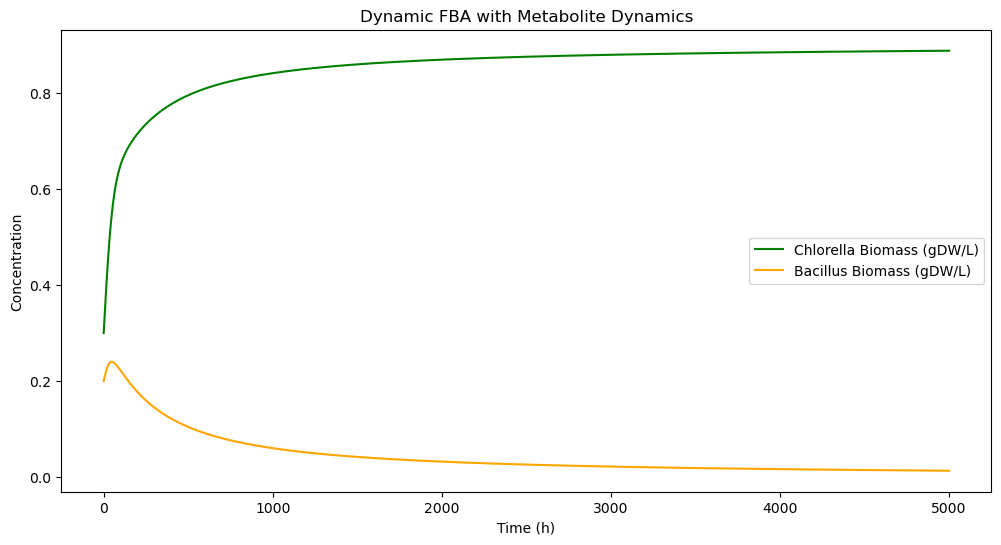

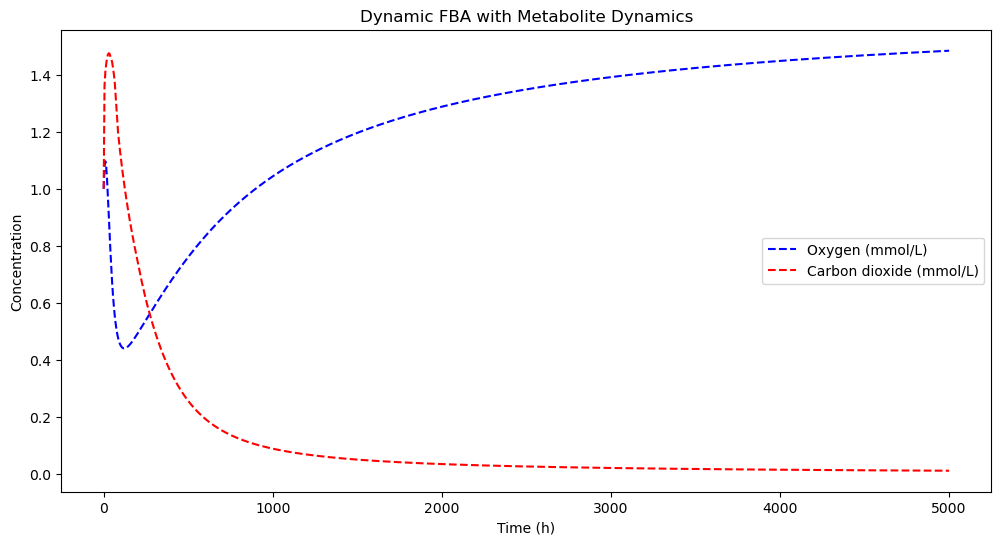

In [24]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.3, 0.2, 1, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 5000, 1000)

# Parámetros de muerte
d_1, d_2 = 0.005, 0.003 # Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x1, x2, O2, CO2  = y
    uptake_o2 = - (1.8* O2 / (1 + O2))
    uptake_co2 = - (0.6 * CO2 / (0.1 + CO2))

    # ------------------
    # Chlorella
    # ------------------
    with chlorella:
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").upper_bound = 1000
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").lower_bound = uptake_co2
        sol_chl = chlorella.optimize()
        v1 = sol_chl.fluxes[chlorella_biomass_rxn]  # tasa de biomasa
        flux_o2_chl = sol_chl.fluxes[chlorella_o2_exchange]
        flux_co2_chl = sol_chl.fluxes["EX_co2_LPAREN_e_RPAREN_"]
        flux_nh4_chl = sol_chl.fluxes["EX_nh4_LPAREN_e_RPAREN_"]
    # ------------------
    # Bacillus
    # ------------------
    with bacillus:
        bacillus.reactions.get_by_id('EX_o2_e').upper_bound = 1000
        bacillus.reactions.get_by_id('EX_o2_e').lower_bound = uptake_o2
        sol_bac = bacillus.optimize()
        v2 = sol_bac.fluxes[bacillus_biomass_rxn]  # tasa de biomasa
        flux_o2_bac = sol_bac.fluxes[bacillus_o2_exchange]  # flujo real de O2 (+/-)
        flux_co2_bac = sol_bac.fluxes["EX_co2_e"]
        flux_nh4_bac = sol_bac.fluxes["EX_nh4_e"]
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx1_dt =  v1*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt =  v2*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = flux_o2_chl * x1 *(1 - x1 - x2)+ flux_o2_bac * x2  - 0.1*O2
    dCO2_dt= flux_co2_chl * x1 + flux_co2_bac * x2  - 0.6*CO2 


    
    NH4 = flux_nh4_chl * x1 + flux_nh4_bac * x2 
    Azucares = sol_bac.fluxes["EX_6pgc_e"]*x2 + sol_bac.fluxes["EX_gam6p_e"]*x2 + sol_bac.fluxes["EX_man6p_e"]*x2 + sol_bac.fluxes["EX_srb__L_e"]*x2
    Fuentes_C= sol_bac.fluxes["EX_ac_e"]*x2 + sol_bac.fluxes["EX_acac_e"]*x2 + sol_bac.fluxes["EX_btd_RR_e"]*x2 + sol_bac.fluxes["EX_for_e"]*x2 + sol_bac.fluxes["EX_lac__L_e"]*x2 + sol_bac.fluxes["EX_pyr_e"]*x2 + sol_bac.fluxes["EX_succ_e"]*x2
    Aminoacidos = sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"]*x1 + sol_bac.fluxes["EX_gly_e"]*x2 + sol_bac.fluxes["EX_pser__L_e"]*x2 + sol_bac.fluxes["EX_tyr__L_e"]*x2 
    Protones= sol_bac.fluxes["EX_h_e"]*x2
    Ácidos_organicos= sol_bac.fluxes["EX_pnto__R_e"]*x2 
    Other_nutrients= sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"]*x1 + sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"]*x1 +sol_bac.fluxes["EX_gsn_e"]*x2 + sol_bac.fluxes["EX_gthox_e"]*x2 + sol_bac.fluxes["EX_thym_e"]*x2 + sol_bac.fluxes["EX_ura_e"]*x2 +sol_bac.fluxes["EX_xan_e"]*x2 + sol_bac.fluxes["EX_xtsn_e"]*x2
    phosphate= sol_bac.fluxes["EX_pi_e"]*x2

    growth_rates["O2"].append(dO2_dt)
    growth_rates["CO2"].append(dCO2_dt)
    growth_rates["chlorella"].append(dx1_dt)
    growth_rates["bacillus"].append(dx2_dt)   
    
    metabolitos_categories_fluxes["NH4"].append(flux_nh4_chl + flux_nh4_bac)
    metabolitos_categories_fluxes["Azúcares"].append(sol_bac.fluxes["EX_6pgc_e"] + sol_bac.fluxes["EX_gam6p_e"] + sol_bac.fluxes["EX_man6p_e"] + sol_bac.fluxes["EX_srb__L_e"])
    metabolitos_categories_fluxes["Fuentes_C"].append(sol_bac.fluxes["EX_ac_e"] + sol_bac.fluxes["EX_acac_e"] + sol_bac.fluxes["EX_btd_RR_e"] + sol_bac.fluxes["EX_for_e"] + sol_bac.fluxes["EX_lac__L_e"] + sol_bac.fluxes["EX_pyr_e"] + sol_bac.fluxes["EX_succ_e"])
    metabolitos_categories_fluxes["Aminoacidos"].append(sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"] + sol_bac.fluxes["EX_gly_e"] + sol_bac.fluxes["EX_pser__L_e"] + sol_bac.fluxes["EX_tyr__L_e"])
    metabolitos_categories_fluxes["Protones"].append(sol_bac.fluxes["EX_h_e"])
    metabolitos_categories_fluxes["Acidos orgánicos"].append(sol_bac.fluxes["EX_pnto__R_e"])
    metabolitos_categories_fluxes["Otros nutrientes"].append(sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"] + sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"] +sol_bac.fluxes["EX_gsn_e"] + sol_bac.fluxes["EX_gthox_e"] + sol_bac.fluxes["EX_thym_e"] + sol_bac.fluxes["EX_ura_e"] +sol_bac.fluxes["EX_xan_e"] + sol_bac.fluxes["EX_xtsn_e"])
    metabolitos_categories_fluxes["fosfato"].append(sol_bac.fluxes["EX_pi_e"])

    metabolitos_categories["NH4"].append(NH4)
    metabolitos_categories["Azúcares"].append(Azucares)
    metabolitos_categories["Fuentes_C"].append(Fuentes_C)
    metabolitos_categories["Aminoacidos"].append(Aminoacidos)
    metabolitos_categories["Protones"].append(Protones)
    metabolitos_categories["Acidos orgánicos"].append(Ácidos_organicos)
    metabolitos_categories["Otros nutrientes"].append(Other_nutrients)
    metabolitos_categories["fosfato"].append(phosphate)
    
    metabolitos_chlorella["EX_ade_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"]*x1 )
    metabolitos_chlorella["EX_arg_DASH_L_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"]*x1)
    metabolitos_chlorella["EX_gua_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"]*x1)
    metabolitos_chlorella["EX_urea_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_urea_LPAREN_e_RPAREN_"]*x1)
    metabolitos_bacillus["EX_6pgc_e"].append(sol_bac.fluxes["EX_6pgc_e"]*x2)        
    metabolitos_bacillus["EX_ac_e"].append(sol_bac.fluxes["EX_ac_e"]*x2)
    metabolitos_bacillus["EX_acac_e"].append(sol_bac.fluxes["EX_acac_e"]*x2)
    metabolitos_bacillus["EX_btd_RR_e"].append(sol_bac.fluxes["EX_btd_RR_e"]*x2)
    metabolitos_bacillus["EX_for_e"].append(sol_bac.fluxes["EX_for_e"]*x2)
    metabolitos_bacillus["EX_fum_e"].append(sol_bac.fluxes["EX_fum_e"]*x2)
    metabolitos_bacillus["EX_gam6p_e"].append(sol_bac.fluxes["EX_gam6p_e"]*x2)
    metabolitos_bacillus["EX_gly_e"].append(sol_bac.fluxes["EX_gly_e"]*x2)
    metabolitos_bacillus["EX_gsn_e"].append(sol_bac.fluxes["EX_gsn_e"]*x2)
    metabolitos_bacillus["EX_gthox_e"].append(sol_bac.fluxes["EX_gthox_e"]*x2)
    metabolitos_bacillus["EX_h_e"].append(sol_bac.fluxes["EX_h_e"]*x2)
    metabolitos_bacillus["EX_icit_e"].append(sol_bac.fluxes["EX_icit_e"]*x2)
    metabolitos_bacillus["EX_lac__L_e"].append(sol_bac.fluxes["EX_lac__L_e"]*x2)
    metabolitos_bacillus["EX_man6p_e"].append(sol_bac.fluxes["EX_man6p_e"]*x2)
    metabolitos_bacillus["EX_pi_e"].append(sol_bac.fluxes["EX_pi_e"]*x2)
    metabolitos_bacillus["EX_pnto__R_e"].append(sol_bac.fluxes["EX_pnto__R_e"]*x2)
    metabolitos_bacillus["EX_pser__L_e"].append(sol_bac.fluxes["EX_pser__L_e"]*x2)
    metabolitos_bacillus["EX_pyr_e"].append(sol_bac.fluxes["EX_pyr_e"]*x2)
    metabolitos_bacillus["EX_srb__L_e"].append(sol_bac.fluxes["EX_srb__L_e"]*x2)
    metabolitos_bacillus["EX_succ_e"].append(sol_bac.fluxes["EX_succ_e"]*x2)
    metabolitos_bacillus["EX_thym_e"].append(sol_bac.fluxes["EX_thym_e"]*x2)
    metabolitos_bacillus["EX_tyr__L_e"].append(sol_bac.fluxes["EX_tyr__L_e"]*x2)
    metabolitos_bacillus["EX_ura_e"].append(sol_bac.fluxes["EX_ura_e"]*x2)
    metabolitos_bacillus["EX_xan_e"].append(sol_bac.fluxes["EX_xan_e"]*x2)
    metabolitos_bacillus["EX_xtsn_e"].append(sol_bac.fluxes["EX_xtsn_e"]*x2)

    
    metabolitos_fluxes["O2"].append(flux_o2_chl + flux_o2_bac) 
    metabolitos_fluxes["CO2"].append(flux_co2_chl+ flux_co2_bac) 
    metabolitos_fluxes["NH4"].append(flux_nh4_chl+ flux_nh4_bac)
    metabolitos_fluxes["EX_ade_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_gua_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_urea_LPAREN_e_RPAREN_"].append(sol_chl.fluxes["EX_urea_LPAREN_e_RPAREN_"])
    metabolitos_fluxes["EX_6pgc_e"].append(sol_bac.fluxes["EX_6pgc_e"])        
    metabolitos_fluxes["EX_ac_e"].append(sol_bac.fluxes["EX_ac_e"])
    metabolitos_fluxes["EX_acac_e"].append(sol_bac.fluxes["EX_acac_e"])
    metabolitos_fluxes["EX_btd_RR_e"].append(sol_bac.fluxes["EX_btd_RR_e"])
    metabolitos_fluxes["EX_for_e"].append(sol_bac.fluxes["EX_for_e"])
    metabolitos_fluxes["EX_fum_e"].append(sol_bac.fluxes["EX_fum_e"])
    metabolitos_fluxes["EX_gam6p_e"].append(sol_bac.fluxes["EX_gam6p_e"])
    metabolitos_fluxes["EX_gly_e"].append(sol_bac.fluxes["EX_gly_e"])
    metabolitos_fluxes["EX_gsn_e"].append(sol_bac.fluxes["EX_gsn_e"])
    metabolitos_fluxes["EX_gthox_e"].append(sol_bac.fluxes["EX_gthox_e"])
    metabolitos_fluxes["EX_h_e"].append(sol_bac.fluxes["EX_h_e"])
    metabolitos_fluxes["EX_icit_e"].append(sol_bac.fluxes["EX_icit_e"])
    metabolitos_fluxes["EX_lac__L_e"].append(sol_bac.fluxes["EX_lac__L_e"])
    metabolitos_fluxes["EX_man6p_e"].append(sol_bac.fluxes["EX_man6p_e"])
    metabolitos_fluxes["EX_pi_e"].append(sol_bac.fluxes["EX_pi_e"])
    metabolitos_fluxes["EX_pnto__R_e"].append(sol_bac.fluxes["EX_pnto__R_e"])
    metabolitos_fluxes["EX_pser__L_e"].append(sol_bac.fluxes["EX_pser__L_e"])
    metabolitos_fluxes["EX_pyr_e"].append(sol_bac.fluxes["EX_pyr_e"])
    metabolitos_fluxes["EX_srb__L_e"].append(sol_bac.fluxes["EX_srb__L_e"])
    metabolitos_fluxes["EX_succ_e"].append(sol_bac.fluxes["EX_succ_e"])
    metabolitos_fluxes["EX_thym_e"].append(sol_bac.fluxes["EX_thym_e"])
    metabolitos_fluxes["EX_tyr__L_e"].append(sol_bac.fluxes["EX_tyr__L_e"])
    metabolitos_fluxes["EX_ura_e"].append(sol_bac.fluxes["EX_ura_e"])
    metabolitos_fluxes["EX_xan_e"].append(sol_bac.fluxes["EX_xan_e"])
    metabolitos_fluxes["EX_xtsn_e"].append(sol_bac.fluxes["EX_xtsn_e"])
    

    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, x2, O2, CO2 = y
    return min(x1, x2) - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

### Estudios dinámicas metabolitos

In [27]:
growth_rate_c =[]
co2_con=[]
growth_rate_b=[]
o2_con=[]
o2_prod=[]
o2_cons=[]
co2_prod=[]
co2_cons=[]

t = 10000.00 h: : 1085it [00:16, 66.03it/s]


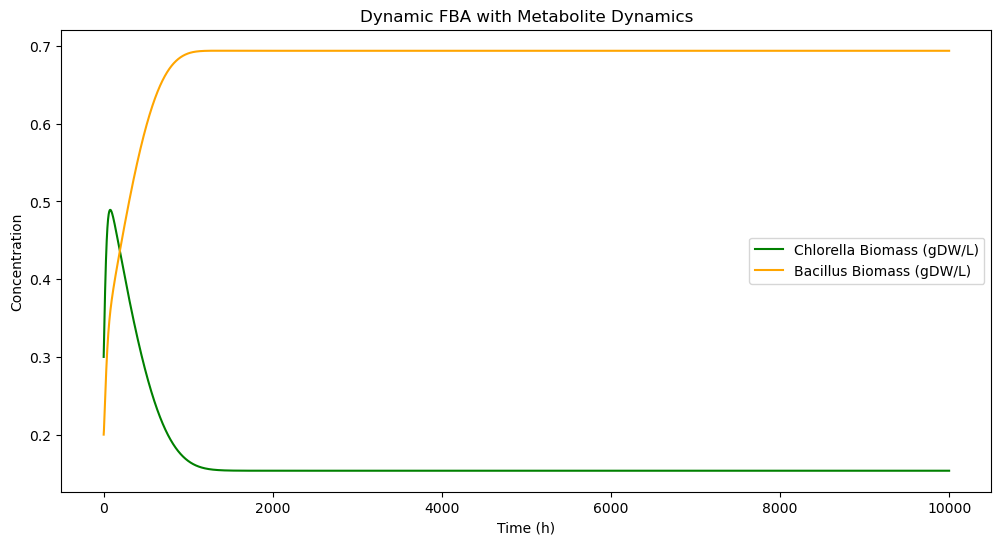

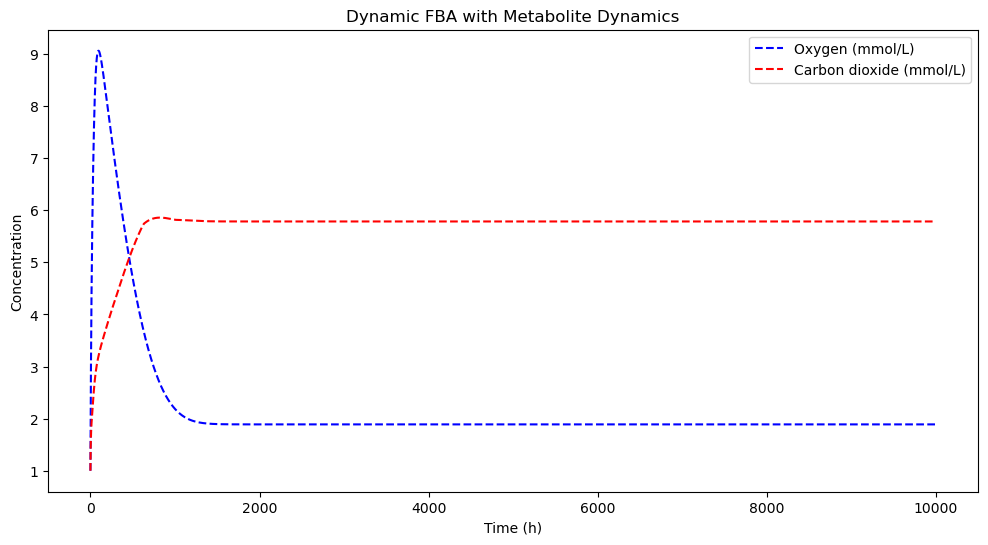

In [32]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.3, 0.2, 1, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 10000, 10000)

# Parámetros de muerte
d_1, d_2 = 0.008, 0.005# Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x1, x2, O2, CO2  = y
    uptake_o2 = - (1.8* O2 / (1 + O2))
    uptake_co2 = - (0.6 * CO2 / (0.1 + CO2))

    # ------------------
    # Chlorella
    # ------------------
    with chlorella:
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").upper_bound = 1000
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").lower_bound = uptake_co2
        sol_chl = chlorella.optimize()
        v1 = sol_chl.fluxes[chlorella_biomass_rxn]  # tasa de biomasa
        flux_o2_chl = sol_chl.fluxes[chlorella_o2_exchange]
        flux_co2_chl = sol_chl.fluxes["EX_co2_LPAREN_e_RPAREN_"]
        flux_nh4_chl = sol_chl.fluxes["EX_nh4_LPAREN_e_RPAREN_"]
    # ------------------
    # Bacillus
    # ------------------
    with bacillus:
        bacillus.reactions.get_by_id('EX_o2_e').upper_bound = 1000
        bacillus.reactions.get_by_id('EX_o2_e').lower_bound = uptake_o2
        sol_bac = bacillus.optimize()
        v2 = sol_bac.fluxes[bacillus_biomass_rxn]  # tasa de biomasa
        flux_o2_bac = sol_bac.fluxes[bacillus_o2_exchange]  # flujo real de O2 (+/-)
        flux_co2_bac = sol_bac.fluxes["EX_co2_e"]
        flux_nh4_bac = sol_bac.fluxes["EX_nh4_e"]
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx1_dt =  v1*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt =  v2*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = flux_o2_chl * x1 + flux_o2_bac * x2*(1 - x1 - x2)  - 0.1*O2
    dCO2_dt= flux_co2_chl * x1*(1 - x1 - x2) + flux_co2_bac * x2  - 0.6*CO2 

    co2_con.append(CO2)
    o2_con.append(O2)
    growth_rate_c.append(v1)
    growth_rate_b.append(v2)
    o2_prod.append(flux_o2_chl)
    o2_cons.append(abs(flux_o2_bac))
    co2_cons.append(abs(flux_co2_chl))
    co2_prod.append(flux_co2_bac)
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, x2, O2, CO2 = y
    return min(x1, x2) - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

#### Growth rates vs oxygen and arbon dioxide conentratins

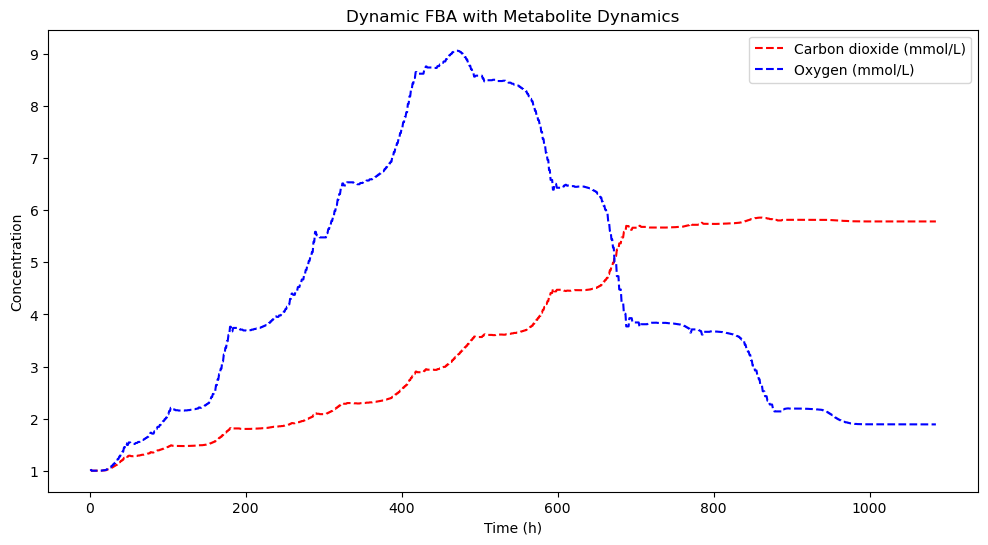

In [39]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(co2_con) + 1)
plt.plot(tiempo, co2_con, label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.plot(tiempo, o2_con, label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

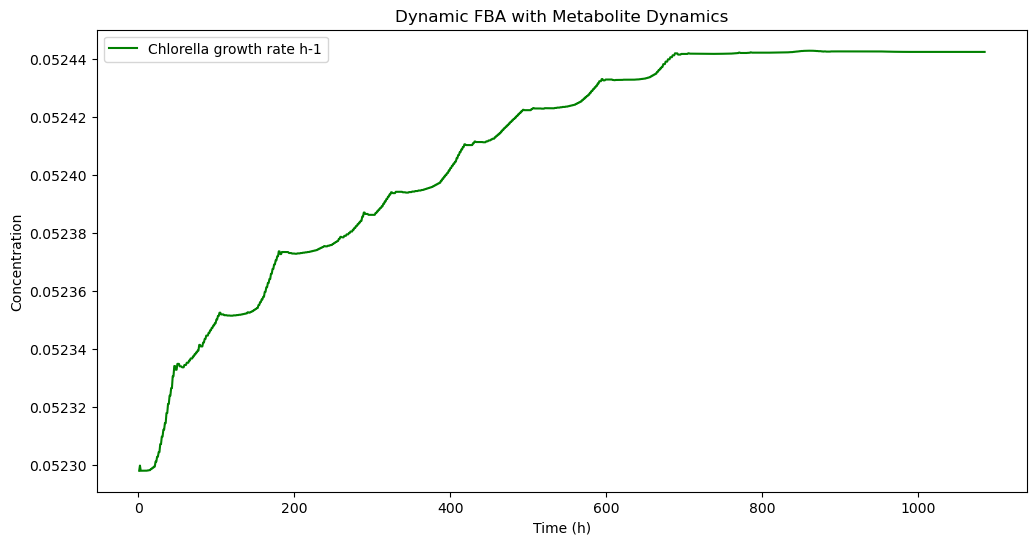

In [40]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, growth_rate_c, label='Chlorella growth rate h-1', color='green')
#plt.plot(tiempo, growth_rate_b, label='Bacillus growth rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

In [41]:
print(growth_rate_c[-1])
print(growth_rate_b[-1])

0.05244241428679378
0.032776508854396265


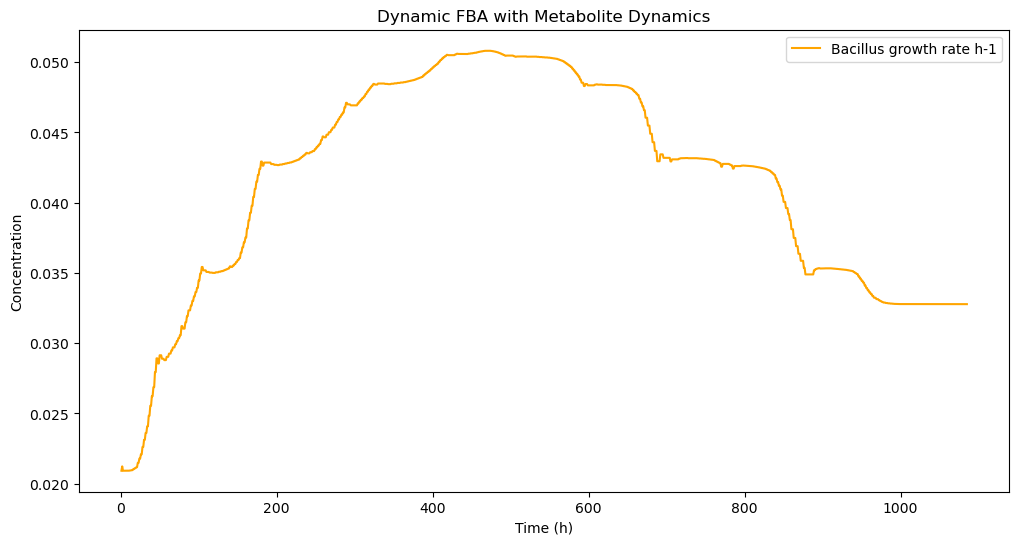

In [42]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, growth_rate_b, label='Bacillus growth rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

#### Production of O2 and CO2 vs O2 and CO2 concentration 

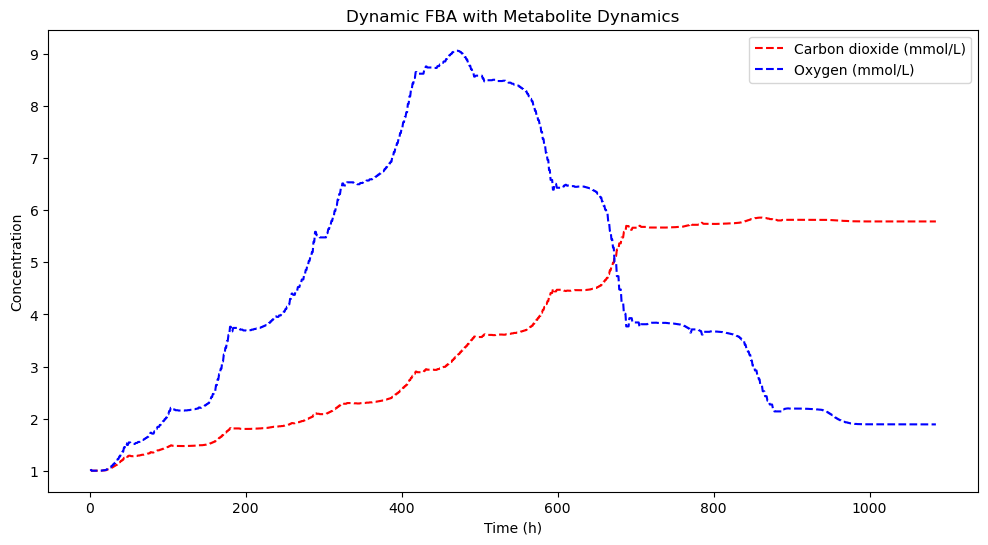

In [44]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(co2_con) + 1)
plt.plot(tiempo, co2_con, label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.plot(tiempo, o2_con, label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

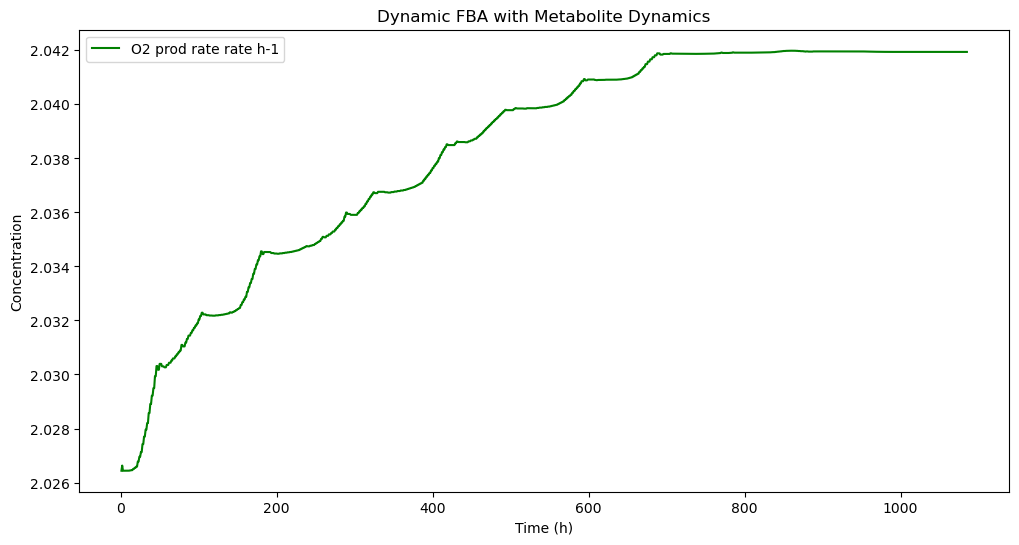

In [45]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, o2_prod, label='O2 prod rate rate h-1', color='green')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

In [46]:
print(co2_cons[-1])
print(o2_cons[-1])
print(growth_rate_c[-1])
print(growth_rate_b[-1])




0.5898049074952635
1.1770499409633628
0.05244241428679378
0.032776508854396265


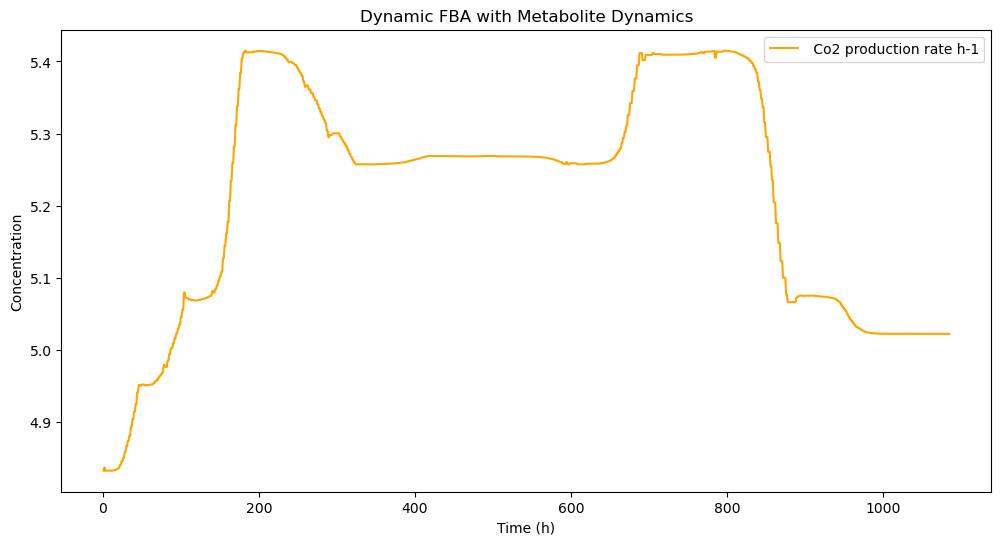

In [47]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, co2_prod, label=' Co2 production rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

#### Consumption of O2 and CO2 vs O2 and CO2 concentration 

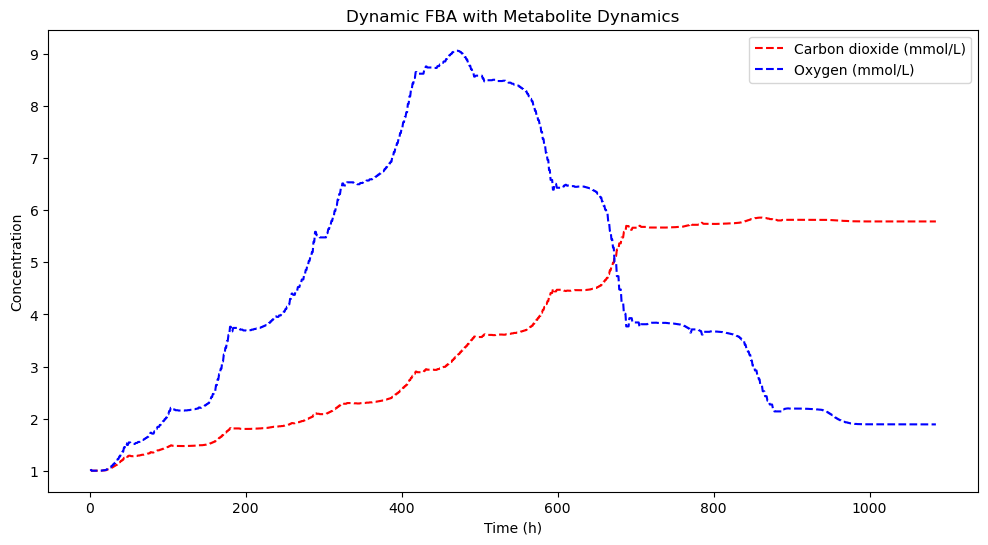

In [49]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(co2_con) + 1)
plt.plot(tiempo, co2_con, label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.plot(tiempo, o2_con, label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

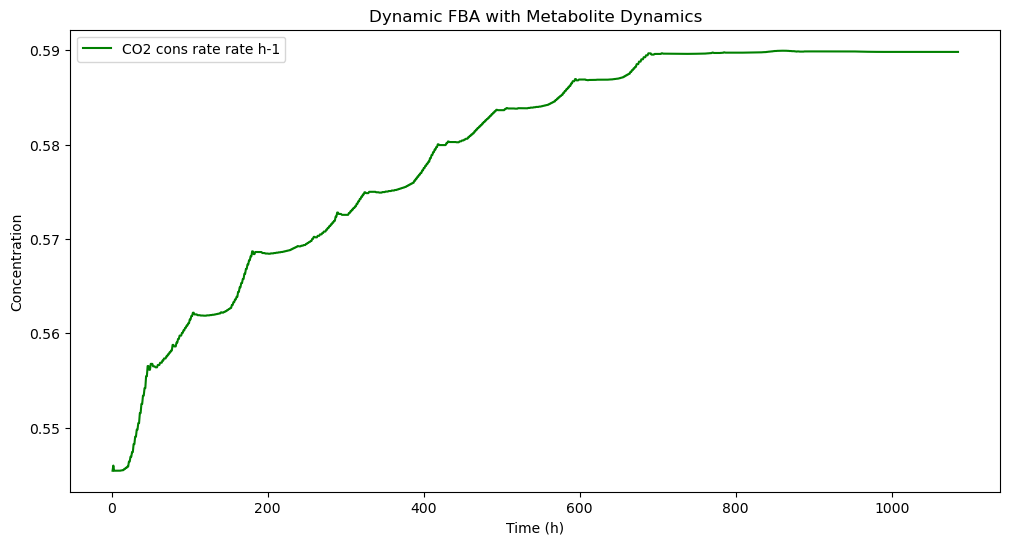

In [50]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, co2_cons, label='CO2 cons rate rate h-1', color='green')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

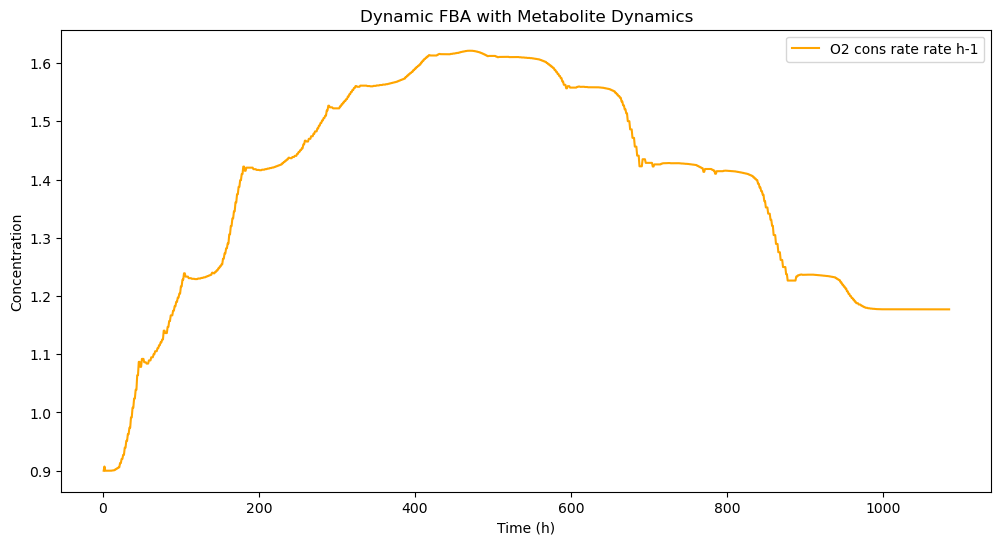

In [51]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, o2_cons, label='O2 cons rate rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

In [52]:
cgr= np.mean(growth_rate_c)
bgr= np.mean(growth_rate_b)
ocr=np.mean(o2_cons)
cdcr= np.mean(co2_cons)


In [53]:
chl_b= sol.y[0]
bac_b= sol.y[1]
o2_c = sol.y[2]
co2_c = sol.y[3]

In [54]:
cdcr

0.5794329360582674

In [55]:
bacillus.reactions.get_by_id('EX_o2_e').upper_bound = 1000
bacillus.reactions.get_by_id('EX_o2_e').lower_bound = 1.8*1/(1+1)

In [56]:
chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").upper_bound = 1000
chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").lower_bound = 0.6*1/(0.1+1)

In [58]:
chlorella.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_LPAREN_e_RPAREN_,0.5,2,4.64%
glc_DASH_A_e,EX_glc_DASH_A_LPAREN_e_RPAREN_,0.5,6,13.91%
gln_DASH_L_e,EX_gln_DASH_L_LPAREN_e_RPAREN_,0.5,5,11.60%
gly_e,EX_gly_LPAREN_e_RPAREN_,0.5,2,4.64%
glyclt_e,EX_glyclt_LPAREN_e_RPAREN_,0.5,2,4.64%
h2o_e,EX_h2o_LPAREN_e_RPAREN_,0.5,0,0.00%
h_e,EX_h_LPAREN_e_RPAREN_,0.5,0,0.00%
hco3_e,EX_hco3_LPAREN_e_RPAREN_,0.5,1,2.32%
his_DASH_L_e,EX_his_DASH_L_LPAREN_e_RPAREN_,0.5,6,13.91%
hxan_e,EX_hxan_LPAREN_e_RPAREN_,0.5,5,11.60%


In [59]:
 0.07032579560396535 / 0.6

0.11720965933994225

In [60]:
0.0689544378512224/ 1.8

0.038308021028456894

### Aproximación matemática

t = 10000.00 h: : 493it [00:00, 3465.56it/s]


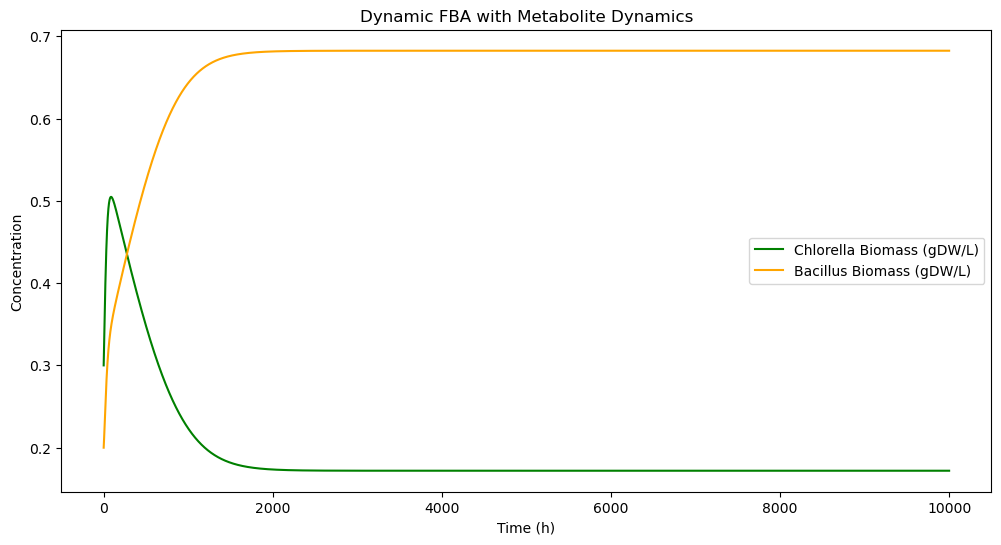

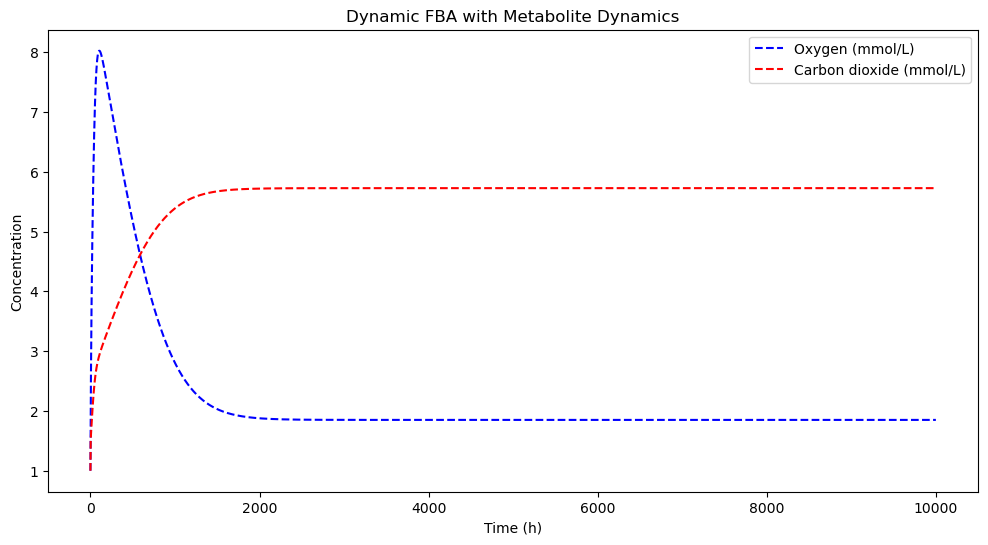

In [63]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.3, 0.2, 1, 1 ]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 10000, 10000)

# Parámetros de muerte
d_1, d_2 = 0.008, 0.005 # Tasa de muerte (1/h)
c1 = 0.05589/0.684555
c2 = 0.05289/1.819735
c4 = 1.819735
c5 = 0.684555
c3 = 1.758
c6 = 5.06
# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    x1, x2, O2, CO2  = y
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    # dx1_dt =  c1* (1.8* O2 / (1 + O2))*x1*(1 - x1 - x2)- x1*d_1
   # dx2_dt =  c2*(0.6* CO2 / (0.1 + CO2))*x2*(1 - x1 - x2)- x2*d_2
    dx1_dt = c1*c5*(CO2/(0.1+CO2))*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt = c2*c4*(O2/(1+O2))*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = c3*x1 - c4*(O2/(1+O2))*x2*(1 - x1 - x2)  - 0.1*O2
    dCO2_dt= -c5*(CO2/(0.1+CO2))*x1*(1 - x1 - x2) + c6*x2  - 0.6*CO2 
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, x2, O2, CO2 = y
    return min(x1, x2) - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

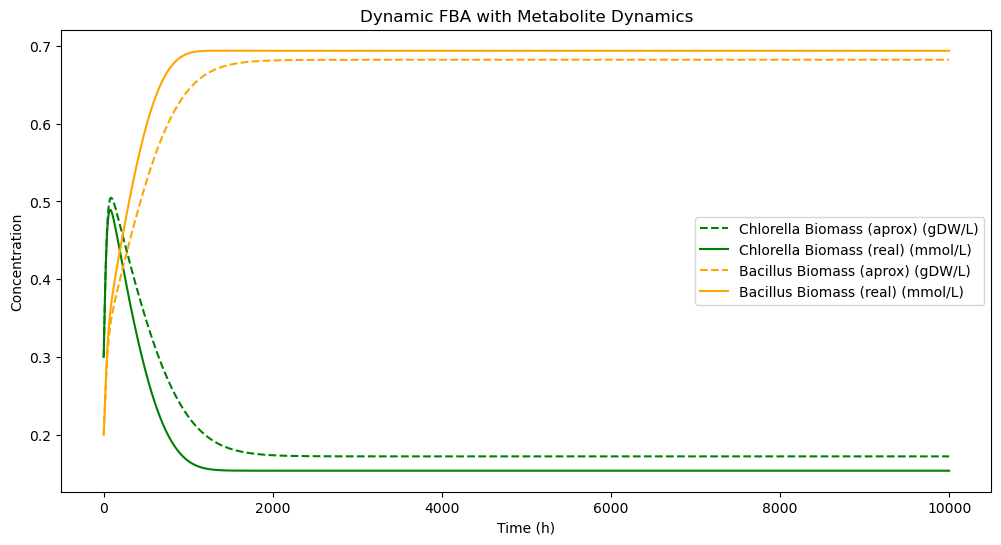

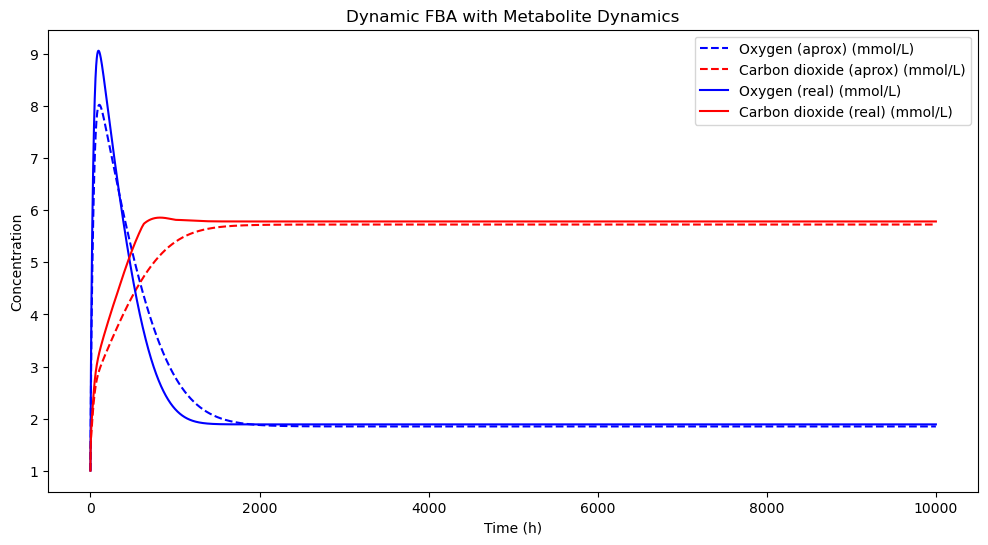

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (aprox) (gDW/L)', linestyle='--', color='green')
plt.plot(sol.t, chl_b, label='Chlorella Biomass (real) (mmol/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Bacillus Biomass (aprox) (gDW/L)', linestyle='--', color='orange')
plt.plot(sol.t, bac_b, label='Bacillus Biomass (real) (mmol/L)', color='orange')

plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (aprox) (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (aprox) (mmol/L)', linestyle='--', color='red')
plt.plot(sol.t, o2_c, label='Oxygen (real) (mmol/L)', color='blue')
plt.plot(sol.t, co2_c, label='Carbon dioxide (real) (mmol/L)', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

In [500]:
from scipy.integrate import odeint
from scipy.optimize import minimize
import numpy as np

# Datos reales (sacados del dFBA)
ts = np.linspace(0, 10000, 10000)
data_real = np.array([chl_b, bac_b, o2_c, co2_c])  # shape: (4, 1000)


In [485]:
def ode_model_con_restricciones(y, t, c1, c2,c3, c4, c5, c6, d_1, d_2):
    x1,x2,O2,CO2 = y
    d_1, d_2 = 0.008, 0.005 # Tasa de muerte (1/h)
    dx1_dt = c1*c5*(CO2/(0.1+CO2))*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt = c2*c4*(O2/(1+O2))*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = c3*x1 - c4*(O2/(1+O2))*x2*(1 - x1 - x2)  - 0.1*O2
    dCO2_dt= -c5*(CO2/(0.1+CO2))*x1*(1 - x1 - x2) + c6*x2  - 0.6*CO2 
    
    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]

def error_con_restricciones(params, y0, ts, data_real, d_1, d_2):
    c1, c2, c3, c4, c5, c6 = params
    sol = odeint(ode_model_con_restricciones, y0, ts, args=(c1, c2, c3, c4, c5, c6, d_1, d_2))
    return np.mean((sol.T - data_real)**2)

# Nuevos parámetros iniciales (solo 4)
params0 = [0.0558/0.684, 0.05289/1.82, 1.7, 1.82, 0.684, 5.1] # c1, c2, c3, c6

# Minimización con restricciones
res = minimize(error_con_restricciones, params0, args=(y0, ts, data_real, d_1, d_2), method='Nelder-Mead')
print("Parámetros óptimos:")
print("c1 =", res.x[0])
print("c2 =", res.x[1])
print("c3 =", res.x[2])
print("c4 =", res.x[3])
print("c5 =", res.x[4])
print("c6 =", res.x[5])


Parámetros óptimos:
c1 = 0.029965137040711964
c2 = 0.008921512096710204
c3 = 2.2869418972606814
c4 = 4.744361672815145
c5 = 1.4874248073343566
c6 = 5.869040454393399


In [453]:
# Suponiendo que ya tienes cargado el modelo
# o BIOMASS_BS_10 para Bacillus

solution = chlorella.optimize()

# Flujo hacia biomasa (biomass yield)
biomasa = solution.fluxes["Biomass_Cvu_auto_DASH_"]

# Flujo de CO₂ consumido
co2_consumido = -solution.fluxes["EX_co2_LPAREN_e_RPAREN_"]  # cuidado con el signo: entrada = flujo negativo

# Eficiencia de conversión de CO₂ en biomasa
rendimiento = biomasa / co2_consumido

print(f"Biomasa producida por unidad de CO2: {rendimiento:.4f}")



Biomasa producida por unidad de CO2: 0.0059


In [89]:
dx1_dt = v1(CO2) * x1 * (1 - x1 - x2) - d1 * x1
dx2_dt = v2(O2) * x2 * (1 - x1 - x2) - d2 * x2

dO2_dt  = flux_o2_chl * x1 + flux_o2_bac * x2 * (1 - x1 - x2) - k_o2 * O2
dCO2_dt = flux_co2_chl * x1 * (1 - x1 - x2) + flux_co2_bac * x2 - k_co2 * CO2


NameError: name 'v1' is not defined

In [108]:
def v1(CO2):
    return 0.05 * (0.6 * CO2 / (0.1 + CO2))  # Monod para Chlorella

def v2(O2):
    return 0.06 * (1.8 * O2 / (1 + O2))      # Monod para Bacillus

# Los flujos metabólicos, puedes afinarlos luego:
# Flujos dependientes de metabolitos (biológicamente realistas)

def flux_o2_bac(O2):
    return -1.8 * O2 / (1 + O2)  # consumo de O2 (negativo) por Bacillus

def flux_co2_chl(CO2):
    return -0.6 * CO2 / (0.1 + CO2)  # consumo de CO2 (negativo) por Chlorella

# Opcional: producción positiva por otro microbio (ej: fotosíntesis de Chlorella)
def flux_o2_chl():
    return 1.7  # producción constante, o puedes usar algo dependiente de x1

def flux_co2_bac():
    return 5.1  # producción constante o dependiente de x2


In [109]:
def sistema(t, y):
    x1, x2, O2, CO2 = y

    # Crecimiento acoplado a disponibilidad de metabolitos
    v1_eff = 0.07 * (0.6 * CO2 / (0.1 + CO2))  # Chlorella (CO2-limited)
    v2_eff = 0.06 * (1.8 * O2 / (1 + O2))      # Bacillus (O2-limited)

    dx1 = v1_eff * x1 * (1 - x1 - x2) - d1 * x1
    dx2 = v2_eff * x2 * (1 - x1 - x2) - d2 * x2

    # Flujos dependientes de metabolitos
    dO2 = flux_o2_chl() * x1 + flux_o2_bac(O2) * x2 * (1 - x1 - x2) - k_o2 * O2
    dCO2 = flux_co2_chl(CO2) * x1 * (1 - x1 - x2) + flux_co2_bac() * x2 - k_co2 * CO2

    return [dx1, dx2, dO2, dCO2]



In [110]:
d1 = 0.005
d2 = 0.003
k_o2 = 0.1
k_co2 = 0.6


In [111]:
from scipy.integrate import solve_ivp

tspan = np.linspace(0, 5000, 1000)
y0 = [0.3, 0.2, 1.0, 1.0]  # Chlorella, Bacillus, O2, CO2

sol = solve_ivp(sistema, [0, 5000], y0, t_eval=tspan)


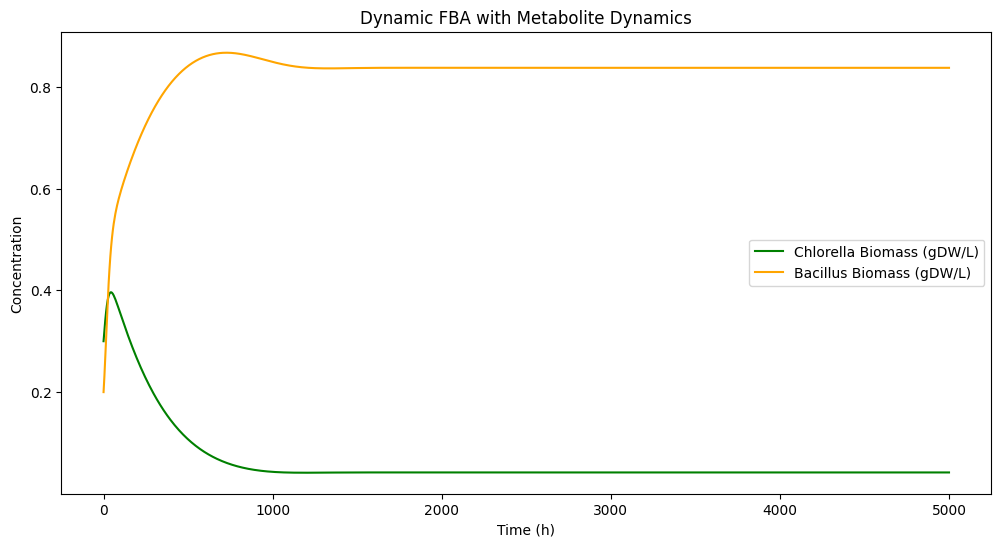

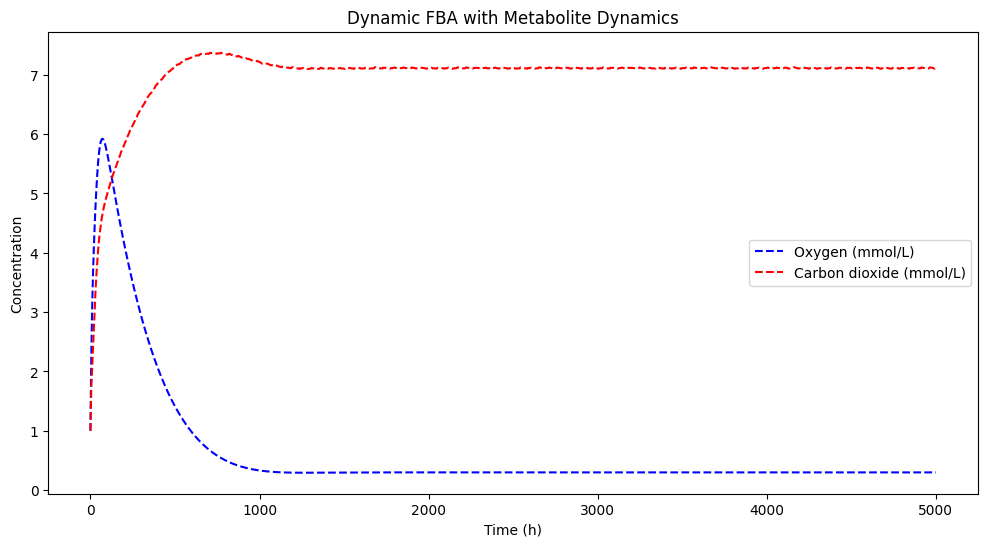

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()